<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методи регуляризації для запобігання перенавчання нейронних мереж

У нейронних мережах перенавчання є серйозною проблемою, коли модель чудово працює на навчальних даних, але не може узагальнити непередбачувані приклади. Методи регуляризації діють як запобіжники, вводячи обмеження або штрафи, які не дають моделі стати надмірно складною і запам'ятовувати навчальні дані замість того, щоб вивчати основні закономірності.

# Розуміння проблеми перенавчання

Уявіть, що ви навчаєте модель класифікувати рукописні цифри. Під час навчання модель може навчитися ідентифікувати специфічні особливості або закономірності, характерні для певних цифр у навчальній вибірці. Наприклад, вона може зафіксувати маленьку діагональну лінію як визначальну характеристику цифри "7". Однак ці ознаки не можуть бути узагальнені на нові цифри з невеликими варіаціями, наприклад, з нахилом лінії. Це може призвести до низької продуктивності на нових даних, навіть якщо модель досягає високої точності на навчальних даних.

![](https://static.javatpoint.com/tutorial/machine-learning/images/overfitting-in-machine-learning3.jpg)




## Dropout
 Ця техніка випадковим чином "відсіває" певний відсоток нейронів під час навчання. Тимчасово видаляючи ці нейрони з мережі, відсів змушує нейрони, що залишилися, вивчати специфічні ознаки з даних і запобігає надмірній залежності від будь-якого конкретного нейрона. Це спонукає модель розвивати більш надійні функції, які менш чутливі до відсутності окремих нейронів.

 ![](https://media.licdn.com/dms/image/C4D12AQEgQmpFt-mI7Q/article-cover_image-shrink_720_1280/0/1595924298540?e=2147483647&v=beta&t=jfjUwRMl6awnN-QKfQjBz9l8Umoeip_PjE8RtHO5uqM)

```python
# Приклад: Шар відсіву з ймовірністю відсіву 20%
dropout = nn.Dropout(p=0.2)
```

## Пакетна нормалізація (BatchNorm)
Ця методика вирішує проблему внутрішнього коваріаційного зсуву, коли розподіл активацій між шарами змінюється під час навчання. BatchNorm нормалізує активації прихованих шарів, роблячи процес навчання більш стабільним і менш чутливим до початкових значень. Ця покращена стабільність може допомогти зменшити надмірне пристосування.

![](https://udohsolomon.github.io/assets/images/gradientdescent.png)

```python
# Приклад: Шар BatchNorm
batch_norm = nn.BatchNorm1d(num_features)
```

# Оптимізатори з вбудованою регуляризацією

## RMSprop (Root Mean Square Prop)
 Цей оптимізатор вирішує проблему зменшення швидкості навчання, що спостерігається у Adagrad, адаптуючи швидкість навчання на основі експоненціально спадаючого середнього квадратичного градієнта. Це особливо корисно для проблем з нестаціонарними або розрідженими градієнтами, де традиційний SGD може не впоратися.

```python
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
```

## Adam (Adaptive Moment Estimation)
 Цей оптимізатор є розширенням RMSprop, яке включає як ковзні середні градієнта, так і квадрати градієнта. Це робить його популярним вибором для різних архітектур нейронних мереж. Adam може допомогти вирішити проблему надмірного пристосування, динамічно регулюючи швидкість навчання на основі минулих градієнтів.

```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

# Заохочення розрідженості ваги

Ця техніка карає модель за великі ваги під час тренування. Додаючи до функції втрат нормальний штрафний член L1 або L2, вагове спадання не дає моделі присвоювати надмірні ваги певним нейронам і сприяє розрідженню ваг, що призводить до спрощення моделі, менш схильної до перенавчання.

![](https://i0.wp.com/vitalflux.com/wp-content/uploads/2022/06/learning-algorithm-in-weight-decay-technique.png?resize=529%2C115&ssl=1)

Спадання ваг можна легко вбудувати у конструктор оптимізатора:

```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)
```

# Графіки швидкості навчання

Швидкість навчання, яка контролює розмір кроку для оновлення ваг під час навчання, також може бути формою регуляризації. Поступово зменшуючи швидкість навчання з часом, ви можете запобігти великому оновленню моделі, яке може призвести до надмірного пристосування. Нижче наведено загальні методи планування швидкості навчання:

* **StepLR:** Зменшує швидкість навчання на коефіцієнт (наприклад, 0.1) через кожну певну кількість епох.
* **ReduceLROnPlateau:** Зменшує швидкість навчання, коли втрати при перевірці перестають покращуватися протягом певної кількості епох. Це корисна техніка для виявлення та реагування на потенційні ознаки надмірного пристосування під час навчання.
```python
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)```

![](https://pbs.twimg.com/media/FeQmxyQX0AAx63h?format=jpg&name=4096x4096)


[документація](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)


# Архітектура

Коли нейронні мережі стають глибшими, вони стикаються з проблемою, відомою як зникаючі градієнти. Це явище ускладнює вивчення мережею довгострокових залежностей у даних, що знижує продуктивність. Дві інноваційні архітектури, залишкові мережі (ResNets) та початкові модулі, вирішують цю проблему і стали фундаментальними будівельними блоками для потужних моделей глибокого навчання.

## Залишкові мережі (ResNets)

Основна ідея залишкових мереж полягає у введенні **пропускних зв'язків**, які дозволяють мережі вивчати відображення ідентичності (просто копіюючи вхідні дані) разом з бажаним перетворенням. Це дозволяє навіть дуже глибоким мережам ефективно навчатися і вивчати складні представлення.

**Структура залишкового блоку:**.

Типовий залишковий блок складається з таких елементів:

* **Вхідний шар:** Отримує вхідні дані.
* **Нелінійні перетворення:** Це можуть бути шари згортки, за якими слідують функції активації (наприклад, ReLU). Ці шари виконують потрібне вилучення та перетворення ознак.
* **Пропустити з'єднання:** Безпосередньо додає вхідні дані до вихідних після нелінійних перетворень. Це гарантує, що на виході зберігається вихідна інформація, а також включаються вивчені ознаки.
* **Вихідний шар:** Сума пропускного з'єднання та перетвореного виходу.

<div>
<img src=https://miro.medium.com/v2/resize:fit:850/1*Kz6QbXWiQQQJCJdgK1b-7Q.png width="500"/>
</div>



**Переваги залишкових мереж**

* **Полегшує проблему зникаючих градієнтів:** Забезпечуючи прямий шлях для градієнтів назад через мережу, залишкові зв'язки допомагають подолати проблему зникаючих градієнтів, дозволяючи більш глибоким мережам ефективно навчатися.
* **Покращена продуктивність:** ResNets продемонстрували найсучаснішу продуктивність при виконанні різних завдань комп'ютерного зору, включаючи класифікацію зображень і виявлення об'єктів.
* **Модульна конструкція:** Залишкові блоки можна легко складати в стек для створення дуже глибоких мереж без втрати точності.



## Початкові модулі(Inception)

Початкові модулі призначені для ефективного захоплення об'єктів різного масштабу на зображенні. Це досягається за рахунок використання фільтрів з різними розмірами ядра (наприклад, 1х1, 3х3, 5х5) в межах одного модуля.

**Структура початкового модуля:**.

Початковий модуль зазвичай складається з чотирьох паралельних гілок:

* **Згортка 1х1:** Виділяє ознаки, що відповідають невеликим просторовим областям.
* **Згортання 3x3 зі зменшенням 1x1:** Зменшує розмірність перед застосуванням згортки 3x3 для захоплення об'єктів середнього розміру.
* **Згортка 5x5 зі зменшенням 1x1:** Подібно до гілки 3x3, але фокусується на об'єктах більшого масштабу.
* **Максимальне об'єднання:** Зменшує вибірку вхідних даних для захоплення просторової інформації в різних масштабах.

![](https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-29611-7_8/MediaObjects/488338_1_En_8_Fig2_HTML.png)

Переваги початкових модулів:

* **Ефективне вилучення об'єктів:** Початкові модулі фіксують об'єкти різних масштабів у межах одного модуля, що підвищує ефективність порівняно з традиційними згортковими шарами з фільтрами різного розміру, які послідовно накладаються один на одного.
* **Зменшена кількість параметрів:** Завдяки використанню менших фільтрів у гілках, початкові модулі досягають високої продуктивності з меншою кількістю параметрів порівняно з деякими іншими архітектурами.
* **Висока продуктивність:** Архітектури Inception (наприклад, InceptionV3) досягли вражаючих результатів у різних задачах класифікації зображень і виявлення об'єктів.

**Вибір правильної архітектури:**

* **ResNets:** Часто є кращим вибором для більш глибоких мереж завдяки своїй здатності пом'якшувати зникаючі градієнти та досягати чудової продуктивності.
* **Початкові модулі:** Добре підходять для захоплення об'єктів у різних масштабах і пропонують більш ефективний спосіб вилучення складних об'єктів зображення.

**На закінчення, як залишкові, так і початкові модулі є потужними архітектурними досягненнями, які суттєво вплинули на сферу глибокого навчання. Розуміння їхніх основних принципів та переваг допоможе вам приймати обґрунтовані рішення при розробці або виборі архітектури для ваших нейромережевих задач.**.

# Нейронні мережі з декількома навчальними частинами

Нейронні мережі з декількома навчальними головками пропонують потужний підхід для навчання моделей глибокого навчання. Ця архітектура виходить за рамки простої регуляризації та зменшення зникаючих градієнтів, відкриваючи кілька переваг для різних завдань. Ось короткий опис концепції та її переваг:

**Що таке множинні навчальні головки?**

У типовій нейронній мережі дані проходять через шари, які поступово виділяють ознаки і в кінцевому підсумку призводять до єдиного результату для конкретного завдання (наприклад, класифікація зображень, аналіз настроїв). На відміну від цього, мережа з декількома навчальними головками має загальну основу для вилучення ознак, за якою слідують кілька незалежних "головок", кожна з яких прогнозує різні результати для різних, але пов'язаних між собою завдань.

![](https://miro.medium.com/v2/resize:fit:685/1*cKFzdA8HNRJ0haKm5DiTtA.png)

Переваги декількох навчальних головок:

* **Регуляризація:** Маючи кілька виходів з окремими функціями втрат, модель змушена вивчати більш надійні та узагальнюючі ознаки. Це може допомогти запобігти надмірному пристосуванню до будь-якої окремої задачі.
* **Покращена продуктивність:** Спільне використання магістралі вилучення ознак дозволяє мережі вивчати ознаки, що стосуються всіх завдань, потенційно покращуючи продуктивність на кожному окремому завданні порівняно з окремими моделями, навченими незалежно один від одного.
* **Багатозадачне навчання:** Ця архітектура особливо добре підходить для сценаріїв багатозадачного навчання, коли кілька пов'язаних між собою завдань можуть отримати вигоду від спільного представлення. Наприклад, модель, що аналізує зображення, може мати головки для класифікації об'єктів, підписів до зображень і виявлення об'єктів, використовуючи одні й ті ж шари вилучення ознак.
* **Ефективність:** Навчання однієї мережі з декількома головками може бути ефективнішим, ніж навчання окремих моделей для кожної задачі, особливо коли задачі мають спільний простір ознак.
* **Запобігання зникненню градієнтів (непряма перевага):** Хоча це не є основною метою використання декількох головок, глибший екстрактор спільних ознак теоретично може запобігати зникненню градієнтів для окремих задач порівняно з дуже глибокими однозадачними мережами. Однак такі методи, як залишкові зв'язки, все ще можуть бути необхідними для дуже глибоких архітектур.

**Приклади застосувань:** * Розпізнавання зображень

* **Розпізнавання зображень:** Модель може мати окремі головки для класифікації об'єктів, виявлення об'єктів і сегментації зображень, використовуючи ті самі візуальні ознаки.
* **Обробка природної мови:** Мережа може мати головки для аналізу настроїв, класифікації тем і розпізнавання іменованих об'єктів у спільному текстовому представленні.
* **Системи рекомендацій:** Модель може передбачати вподобання користувача для різних категорій (наприклад, фільмів, музики) на основі спільних характеристик користувача та об'єкта.

**Міркування щодо реалізації:**

* **Подібність завдань:** Завдання зі спільними заголовками повинні бути пов'язані між собою, щоб отримати вигоду від спільного використання функцій.
* **Дизайн голівки:** Архітектура кожної голівки повинна бути пристосована до конкретного результату відповідної задачі.
* **Поєднання функцій втрат:** Вам може знадобитися об'єднати функції втрат кожної з головок з відповідним зважуванням, щоб збалансувати їхню важливість під час навчання.

**Висновок:**

Нейронні мережі з декількома навчальними головками - це універсальна і потужна архітектура, яка пропонує переваги, що виходять за рамки простої регуляризації. Завдяки використанню спільного вилучення функцій і специфічних для завдання виходів, цей підхід може підвищити продуктивність, підвищити ефективність і забезпечити ефективне багатозадачне навчання. Оскільки глибоке навчання продовжує розвиватися, ця архітектура, ймовірно, буде відігравати все більш важливу роль у різних додатках.

#  Імпорт бібліотек

In [ ]:
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

# Створення Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Airline%20Passenger%20Satisfaction.csv",
                 usecols=['Ease of Online booking', 'Inflight wifi service', 'Food and drink', 'Seat comfort', 'satisfaction']
                 )

df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

df.head()

,Inflight wifi service,Ease of Online booking,Food and drink,Seat comfort,satisfaction
0,5,3,3,3,1
1,1,3,5,5,1
2,2,2,2,2,0
3,0,0,3,4,1
4,2,4,4,2,1


In [ ]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values)
      self.y = torch.FloatTensor(y.values)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns='satisfaction')
y = df['satisfaction']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=y)

dataset_train = MyDataset(X_train, y_train)
dataset_test = MyDataset(X_test, y_test)

* Створюємо Dataset даних з ознаками `X` та відповідними цільовими значеннями `y`.
* Клас `MyDataset` успадковується від `torch.utils.data.Dataset` і визначає методи доступу до даних.
* `__len__` повертає розмір набору даних.
* `__getitem__` повертає вибірку даних (ознаки та ціль) за певним індексом.

# Створення DataLoader

In [1]:
from torch.utils.data import DataLoader

batch_size = 128
train_dl = DataLoader(dataset_train,  # датасет з даними
                      batch_size=batch_size,  # кількість даних в одному пакеті
                      shuffle=True)  # чи треба перемішувати дані)

test_dl = DataLoader(dataset_test,  # датасет з даними
                     batch_size=batch_size,  # кількість даних в одному пакеті
                     shuffle=True)  # чи треба перемішувати дані)

NameError: name 'dataset_train' is not defined

* `DataLoader` керує пакетним завантаженням та перемішуванням набору даних під час навчання.
* ``batch_size`` задає кількість вибірок, що обробляються разом у кожній ітерації.
* `shuffle=True` рандомізує порядок зразків у кожній епосі (навчальній ітерації).

# Створення моделі

## Блок

In [ ]:
from torch import nn
import torch.nn.functional as F


class Block(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, output_dim)
        self.linear2 = nn.Linear(output_dim, output_dim)
        self.linear3 = nn.Linear(output_dim, output_dim)

        self.norm = nn.BatchNorm1d(output_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = self.norm(out)  # пакетна нормалізація
        out = F.relu(out)

        old_neurons = out

        out = self.linear2(out)
        out = F.relu(out)

        out = self.linear3(out)
        out = F.relu(out)

        return out + old_neurons  # залишковий зв'язок



Block(20, 10)

Block(
  (linear1): Linear(in_features=20, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=10, bias=True)
  (norm): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

## Модель

In [ ]:
class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.block1 = Block(input_dim, hidden_dim)
        self.block2 = Block(hidden_dim, hidden_dim//2)

        self.dropout = nn.Dropout(0.1)  # 10% нейронів буде викинуто

        self.linear1 = nn.Linear(hidden_dim//2, hidden_dim//4)
        self.linear2 = nn.Linear(hidden_dim//4, output_dim)


    def forward(self, x):
        out = self.block1(x)
        out = self.dropout(out)

        out = self.block2(out)

        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.sigmoid(out)

        return out



model = MyModel(4, 50, 1)
model

MyModel(
  (block1): Block(
    (linear1): Linear(in_features=4, out_features=50, bias=True)
    (linear2): Linear(in_features=50, out_features=50, bias=True)
    (linear3): Linear(in_features=50, out_features=50, bias=True)
    (norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block2): Block(
    (linear1): Linear(in_features=50, out_features=25, bias=True)
    (linear2): Linear(in_features=25, out_features=25, bias=True)
    (linear3): Linear(in_features=25, out_features=25, bias=True)
    (norm): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=25, out_features=12, bias=True)
  (linear2): Linear(in_features=12, out_features=1, bias=True)
)

Перевіряємо розмірності

In [ ]:
from torchsummary import summary

summary(model, input_size=(4,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]             250
       BatchNorm1d-2                   [-1, 50]             100
            Linear-3                   [-1, 50]           2,550
            Linear-4                   [-1, 50]           2,550
             Block-5                   [-1, 50]               0
           Dropout-6                   [-1, 50]               0
            Linear-7                   [-1, 25]           1,275
       BatchNorm1d-8                   [-1, 25]              50
            Linear-9                   [-1, 25]             650
           Linear-10                   [-1, 25]             650
            Block-11                   [-1, 25]               0
           Linear-12                   [-1, 12]             312
           Linear-13                    [-1, 1]              13
Total params: 8,400
Trainable params: 8

# Визначення функції втрат та оптимізатора

In [ ]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

* Визначаємо функцію втрат як `nn.MSELoss`, яка підходить для задач регресії (вимірює середньоквадратичну різницю між прогнозами та цілями).
* Вибираємо оптимізатор градієнтного спуску (`torch.optim.SGD`) для налаштування ваг моделей під час навчання.
* Швидкість навчання (`lr=0.01`) контролює розмір кроку оптимізатора.

# Цикл навчання

In [ ]:
# @title Функція для тренування
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['lr'] = []
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = F.sigmoid(y_pred)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()

            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
              try:
                  history_train[name] += func(y, y_pred) * x.size(0)
              except:
                  if task == 'binary': y_pred_ = y_pred.round()
                  elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                  history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                y_pred = F.sigmoid(y_pred)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [ ]:
from sklearn.metrics import accuracy_score

history = train(model, optimizer, loss_fn, train_dl, test_dl,
                epochs=20,
                metrics=[accuracy_score],
                device=device,
                task='binary')

train() called: model=MyModel, opt=Adam(lr=0.001000), epochs=20, device=cpu

Epoch    1    1sec	loss:      0.469	val_loss:       0.45	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    2    1sec	loss:      0.459	val_loss:      0.452	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    3    1sec	loss:      0.454	val_loss:      0.444	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    4    1sec	loss:      0.449	val_loss:       0.44	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    5    1sec	loss:      0.446	val_loss:      0.435	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    6    1sec	loss:      0.446	val_loss:      0.435	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    7    1sec	loss:      0.443	val_loss:      0.433	accuracy_score:      0.439	val_accuracy_score:      0.439	
Epoch    8    1sec	loss:      0.442	val_loss:      0.434	accuracy_score:      0.439	val_accuracy_score:      0.

## Графіки

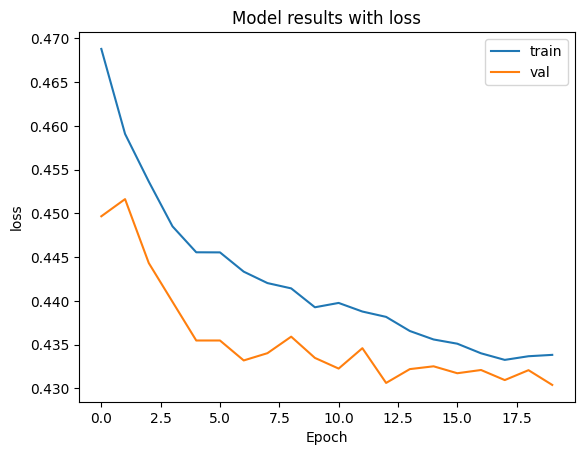

In [ ]:
import matplotlib.pyplot as plt

def plot_metric(history, name):
  plt.title(f"Model results with {name}")
  plt.plot(history[name], label='train')
  plt.plot(history['val_'+name], label='val')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend()


plot_metric(history, 'loss')

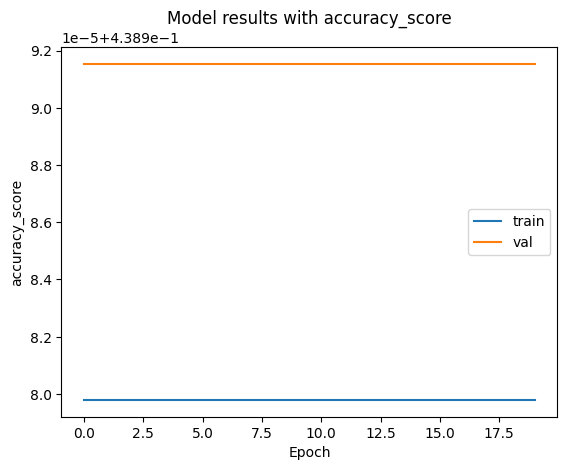

In [ ]:
plot_metric(history, 'accuracy_score')